## 1. Objetivo:

Realizar un análisis de datos sobre distintos datasets y ver su distribución. Luego, analizar la técnica   de   Regresión   Lineal   y   a   partir   de   esta,   obtener   modelos   que   permitan   predecir   elcomportamiento de variables

## 2. Desarrollo:

### 2.1 Importo Librerías:

In [11]:
import pandas as pd
import numpy as np  
# Seaborn is a Python data visualization library based on matplotlib. 
# It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
import matplotlib.pyplot as plt   #Data visualisation libraries 
import scipy as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### 2.2 Transformar a Dataframe:

In [13]:
#cargamos los datos de entrada
data = pd.read_csv("./data/iot_telemetry_data.csv")
#veamos cuantas dimensiones y registros contiene
data.shape
#Muestra los primeros 5 datos
data.head()

ts             device        co   humidity  light       lpg  \
0  1.594512e+09  b8:27:eb:bf:9d:51  0.004956  51.000000  False  0.007651   
1  1.594512e+09  00:0f:00:70:91:0a  0.002840  76.000000  False  0.005114   
2  1.594512e+09  b8:27:eb:bf:9d:51  0.004976  50.900000  False  0.007673   
3  1.594512e+09  1c:bf:ce:15:ec:4d  0.004403  76.800003   True  0.007023   
4  1.594512e+09  b8:27:eb:bf:9d:51  0.004967  50.900000  False  0.007664   

   motion     smoke       temp  
0   False  0.020411  22.700000  
1   False  0.013275  19.700001  
2   False  0.020475  22.600000  
3   False  0.018628  27.000000  
4   False  0.020448  22.600000

### 2.3 Media y desvío standard de Monóxido de Carbono, Humedad y temperatura.

---

**Desvío:**
La desviación estándar permite medir la dispersión de los números en un conjunto de datos. Los valores grandes de las desviaciones estándar muestran que los elementos de un conjunto de datos están más dispersos que su valor medio.

---

In [14]:
# Estadística de datos:
data.describe()

ts             co       humidity            lpg  \
count  4.051840e+05  405184.000000  405184.000000  405184.000000   
mean   1.594858e+09       0.004639      60.511694       0.007237   
std    1.994984e+05       0.001250      11.366489       0.001444   
min    1.594512e+09       0.001171       1.100000       0.002693   
25%    1.594686e+09       0.003919      51.000000       0.006456   
50%    1.594858e+09       0.004812      54.900000       0.007489   
75%    1.595031e+09       0.005409      74.300003       0.008150   
max    1.595203e+09       0.014420      99.900002       0.016567   

               smoke           temp  
count  405184.000000  405184.000000  
mean        0.019264      22.453987  
std         0.004086       2.698347  
min         0.006692       0.000000  
25%         0.017024      19.900000  
50%         0.019950      22.200000  
75%         0.021838      23.600000  
max         0.046590      30.600000

#### 2.3.1 Media de desvio estandar:

In [23]:
data.mean()

ts          1.594858e+09
co          4.638845e-03
humidity    6.051169e+01
light       2.777183e-01
lpg         7.237126e-03
motion      1.189583e-03
smoke       1.926361e-02
temp        2.245399e+01
dtype: float64

#### 2.3.2 Desvío estandar:

In [25]:
data.std()

ts          199498.399261
co               0.001250
humidity        11.366489
light            0.447874
lpg              0.001444
motion           0.034470
smoke            0.004086
temp             2.698347
dtype: float64

### 2.4  Graficar de a pares a cada variable para estudiar las distintas relaciones entre ellas.

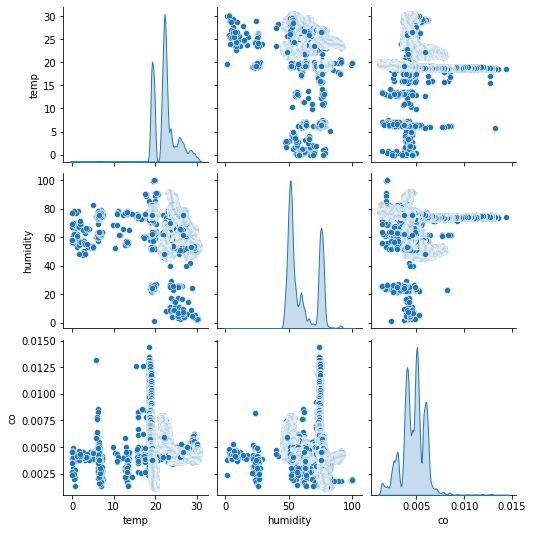

In [37]:
sns.pairplot(data, vars=["temp", "humidity","co"], diag_kind="kde")


### 2.5 Analizar la distribución de Monóxido de Carbono y de Humedad, mediante histogramas. En base a este ítem y el anterior, estudiar los coeficientes de correlación. 

In [33]:
data_co_humedity = data[["temp", "humidity"]]
pearson_correlacion = data_co_humedity.corr(method='pearson')
pearson_correlacion

temp  humidity
temp      1.000000 -0.410427
humidity -0.410427  1.000000

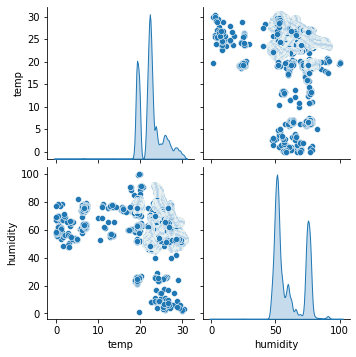

In [36]:
sns.pairplot(data_co_humedity, diag_kind="kde")

### 2.6  Tomando   en   cuenta   el   punto   anterior,   analizar   cuáles   variables   serían   convenientes integrarlas en un modelo de Regresión Lineal y obtener dicho modelo.

In [40]:
X = data['co']
y = data['smoke']
# Se reacomodan los valores para usar el modelo LinearRegression()
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

In [45]:
# A continuación se indica que el 40% de los datos serán datos de prueba 
# y el resto permanece en el conjunto de entrenamiento.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [46]:
#Modelo de Regresión Lineal
l_r = LinearRegression()

In [48]:
 #Se entrena al algoritmo
l_r.fit(X_train,y_train)

LinearRegression()

In [52]:
# Se obtienen los coeficientes del modelo lineal
l_r.coef_

array([[3.26370485]])

In [54]:
 #Se obtiene la Ordenada al origen
l_r.intercept_

array([0.00412426])

In [56]:
 # Una vez obtenida el modelo, se lo prueba con los valores de testeo
y_pred = l_r.predict(X_test)

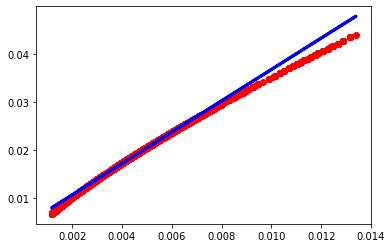

In [58]:
# grafico
plt.scatter(X_test, y_test,  color='red')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show() 

In [60]:
#errores:

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.00013717675472458567

In [61]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

6.18615449556124e-08